In [1]:
import sys
import pandas
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import corner
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

sys.path.append("./DependenceFitter-V2")

from DependenceFitter import DependenceFitter1,DependenceFitter2
from DependenceFitter import median_and_error,get_computed_jpm, tau0_to_tau1

JPM, rho_iter = get_computed_jpm()

Computing JPM


# Fig1. JPM

Text(-0.35, 0.018, '$\\log \\rho_{\\rm in} = -0.5 $')

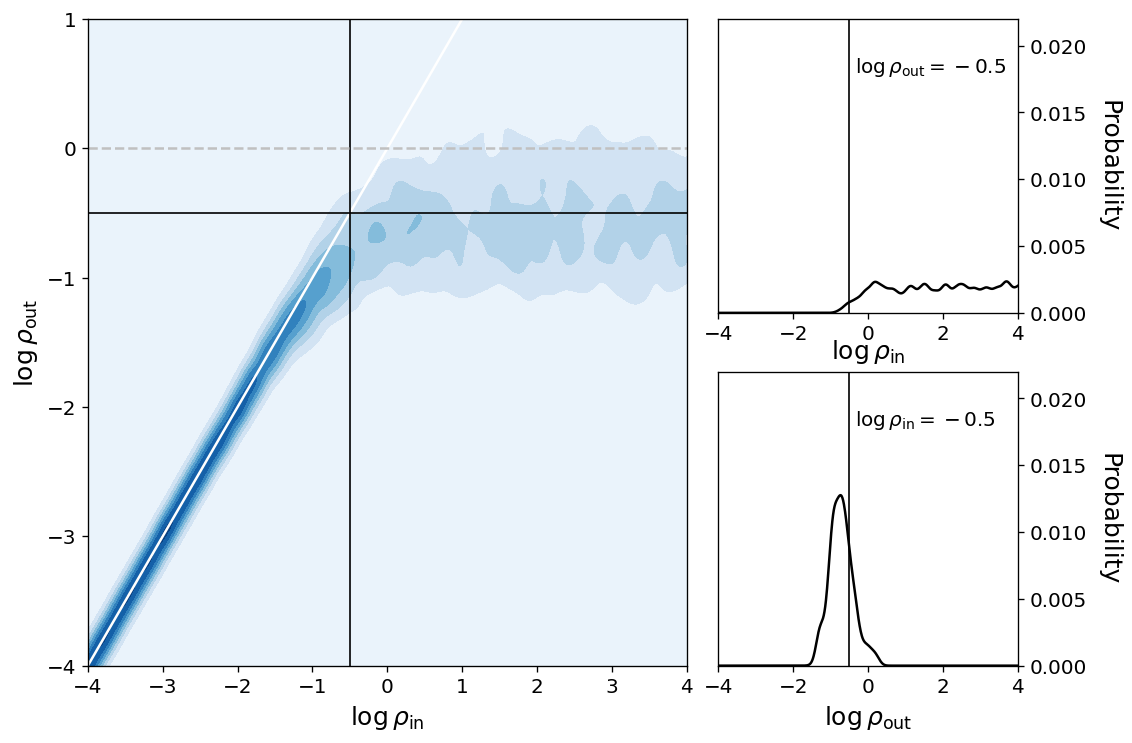

In [2]:
H2 = JPM[-1]
fig = plt.figure(figsize=(10,7), dpi=120,facecolor='white')

gs = gridspec.GridSpec(2, 2, height_ratios=[0.5,0.5], width_ratios=[0.8,0.4])
gs.update(hspace=0.2)
gs.update(wspace=0.07)

ax0 = fig.add_subplot(gs[:,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,1])
ax0.contourf(rho_iter,rho_iter, H2,cmap='Blues')

ax0.set_xlim(-4,4)
ax0.set_ylim(-4,1)

ax0.plot(np.arange(-4,5),np.arange(-4,5),'w-')
# ax.axvline(-3, color='k', ls='--')
# ax.axhline(-3, color='k', ls='--')
ax0.axvline(-0.5, color='k', ls='-', lw=1)
ax0.axhline(-0.5, color='k', ls='-', lw=1)
ax0.axhline(0 , color='silver', ls='--')
# ax0.axhline(np.log10(0.07), color='silver', ls='--')
ax0.set_ylabel(r"$\log \rho_{\rm out} $", fontsize=15)
ax0.set_xlabel(r"$\log \rho_{\rm in} $", fontsize=15)
ax0.tick_params(axis='both', labelsize=12)

ind = np.argmin(np.abs(rho_iter - np.log10(0.5)))
ax1.plot(rho_iter, H2[ind,:]/np.sum(H2[ind,:]), color='k')
ax1.axvline(-0.5, color='k',lw=1)
ax1.set_ylim(0,0.022)
ax1.set_xlim(-4,4)
ax1.set_xlabel(r"$\log \rho_{\rm in} $", fontsize=15,labelpad=5,va='center',ha='center')

ax1.set_ylabel(r"Probability",fontsize=15, rotation=-90,labelpad=20,va='bottom',ha='center')
ax1.yaxis.set_major_locator(MultipleLocator(0.005))
ax1.text(-0.35,0.018,r"$\log \rho_{\rm out} = -0.5 $",fontsize=12)
ax1.tick_params(axis='y', which='both',labelright=True, labelleft=False,right=True, left=False)
ax1.yaxis.set_label_position('right')
ax1.tick_params(axis='both', labelsize=12)

ax2.plot(rho_iter, H2[:,ind]/np.sum(H2[:,ind]), color='k')
ax2.set_ylim(0,0.022)
ax2.set_xlim(-4,4)
ax2.axvline(-0.5, color='k',lw=1)
ax2.set_xlabel(r"$\log \rho_{\rm out} $", fontsize=15)
ax2.set_ylabel(r"Probability",fontsize=15, rotation=-90,labelpad=20,va='bottom',ha='center')
ax2.yaxis.set_major_locator(MultipleLocator(0.005))
ax2.tick_params(axis='y', which='both',labelright=True, labelleft=False,right=True, left=False)
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='both', labelsize=12)
ax2.text(-0.35,0.018,r"$\log \rho_{\rm in} = -0.5 $",fontsize=12)
# fig.savefig("fig1.png",bbox_inches="tight")

# Toy Model
## We generate a set of tau_in following a certain relation log tau_in = 0.5 * log(M_BH) - 1.7 + \epsilon

(0.0, 5.0)

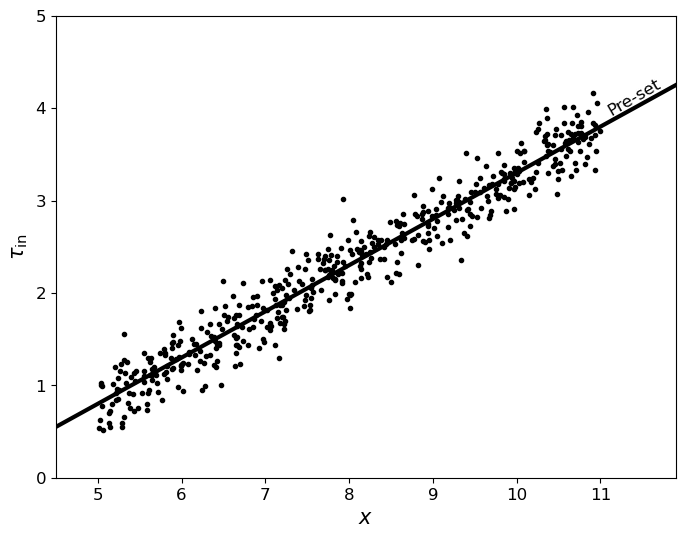

In [3]:
np.random.seed(7)
n_samples = 500
noise = 0.2
logMBH_array = np.random.uniform(5, 11, n_samples)
baseline = np.random.uniform(10,1e3,n_samples)
n_cadence = np.random.uniform(10,1e3,n_samples)
tau_in = np.random.normal(0.5*logMBH_array-1.7, noise)
fig, ax = plt.subplots(1,1, figsize=(8,6))
x_iter = np.arange(3,13)
ax.plot(logMBH_array, tau_in, 'k.')
ax.plot(x_iter, 0.5*x_iter-1.7, lw=3,color='k')
ax.text(11.4,  0.5*11.4-1.7+0.12, "Pre-set", rotation=30, ha='center', va='center', color='k', fontsize=12)

ax.tick_params(axis='both', labelsize=12)
ax.set_xlabel(r"$x$", fontsize=15)
ax.set_ylabel(r"$\tau_{\rm in}$", fontsize=15)
ax.set_xlim(4.5,11.9)
ax.set_ylim(0,5)

## Here we simulate the underestimation and fit with our approach

In [4]:
tau_m, tau_std = tau0_to_tau1(tau_in, baseline, n_cadence)
tau =  np.random.normal(tau_m, tau_std)

choice = np.random.choice(np.where(10**tau < baseline)[0], size=100)
mask = 10**tau_m[choice] < 0.1 * baseline[choice]

tau = tau[choice]
baseline = baseline[choice]
n_cadence = n_cadence[choice]
log_M_BH = logMBH_array[choice]
flat_samples = DependenceFitter1(tau, baseline,n_cadence, log_M_BH).fit()

100%|███████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.42it/s]


[ 0.33952021 -0.86369934]
[0.19718965 0.09567369]


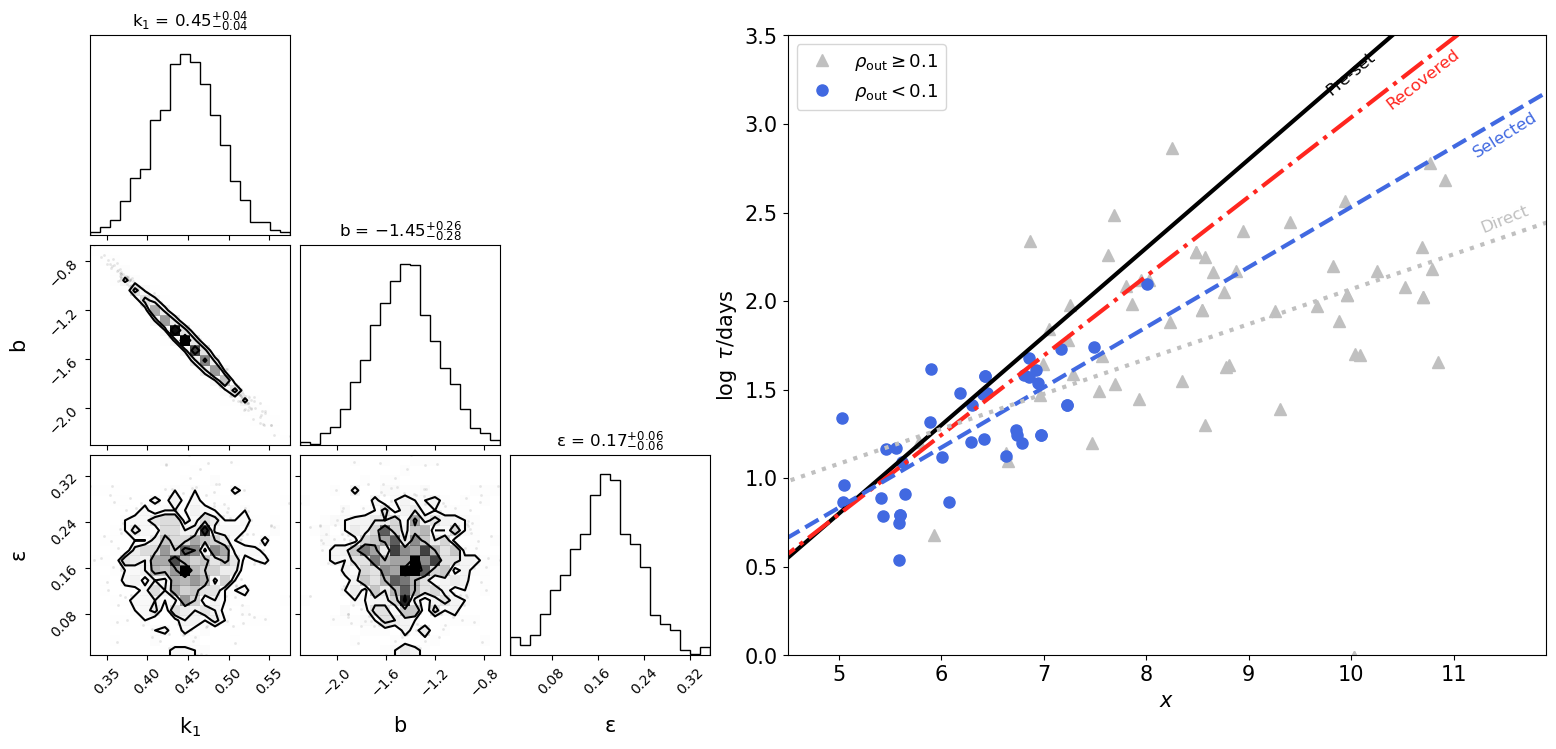

In [5]:
x_iter = np.arange(3,13)
fig_corner = corner.corner(
    flat_samples,show_titles=True,labels=[r"$\rm k_1$",r"$\rm b$",r"$\rm \epsilon$"],
    label_kwargs = dict(fontsize=15), title_kwargs=dict(fontsize=12),
    figsize=(8,6)
);
gs = gridspec.GridSpec(ncols=2, nrows=1, figure=fig_corner)
ax = fig_corner.add_subplot(gs[:, -1])
box = ax.get_position()
box.x0 = box.x0 + 0.5
box.x1 = box.x1 + 1.1
ax.set_position(box)

ax.plot(log_M_BH[~mask], tau[~mask], '^',markersize=8, c='silver', label=r"$\rho_{\rm out}\geq 0.1$")
ax.plot(log_M_BH[mask], tau[mask], 'o', markersize=8, c='royalblue', label=r"$\rho_{\rm out}< 0.1$")
ax.plot(x_iter, 0.5*x_iter-1.7, lw=3,color='k')
ax.text(10, np.log10(160*10**(0.5*(10-8)))+0.08, "Pre-set", rotation=40, ha='center', va='center', color='k', fontsize=12)
ax.plot(x_iter, np.poly1d([np.median(flat_samples[:,0]), np.median(flat_samples[:,1])])(x_iter), lw=3,ls='-.',color='#FF261F')
ax.text(10.7, np.poly1d([np.median(flat_samples[:,0]), np.median(flat_samples[:,1])])(10.7) - 0.1, "Recovered", rotation=38, ha='center', va='center', color='#FF261F', fontsize=12)
ax.plot(x_iter, np.poly1d(np.polyfit(log_M_BH[mask], tau[mask], deg=1))(x_iter), lw=3,ls='--', color='royalblue')
ax.text(11.5, np.poly1d(np.polyfit(log_M_BH[mask], tau[mask], deg=1))(11.5) - 0.1, "Selected", rotation=32, ha='center', va='center', color='royalblue', fontsize=12)
print(np.polyfit(log_M_BH[mask], tau[mask], deg=1))

ax.plot(x_iter, np.poly1d(np.polyfit(log_M_BH, tau, deg=1))(x_iter), lw=3,ls=':', color='silver')
ax.text(11.5, np.poly1d(np.polyfit(log_M_BH, tau, deg=1))(11.5) + 0.1, "Direct", rotation=22, ha='center', va='center', color='silver', fontsize=12)
print(np.polyfit(log_M_BH, tau, deg=1))

ax.set_xlabel(r"$x$", fontsize=15)
ax.set_ylabel(r"$\log\ \tau/{\rm days}$", fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.set_xlim(4.5,11.9)
ax.set_ylim(0,3.5)
ax.legend(fontsize=13)
# fig_corner.savefig("fig2.png",bbox_inches="tight")

This case is deliberately chosen and provides an intuitive illustration of the effect of our approach.

In fact, when the random seed is changed (np.random.seed(7)), the results differ significantly.

We can test the effectiveness of our approach in this toy model, similar to the analysis in Section 3 of the paper.

Here, we randomly repeat the process 100 times.

In [6]:
# Coefs_tuple = []
# n_samples = 500
# noise = 0.25
# for i in range(100):
#     x = np.random.uniform(5, 11, n_samples)
#     baseline = np.random.uniform(10,1e3,n_samples)
#     n_cadence = np.random.uniform(10,1e3,n_samples)
#     tau_in = np.random.normal(0.5*x-1.7, noise)
#     tau_m, tau_std = tau0_to_tau1(tau_in, baseline, n_cadence)
#     tau =  np.random.normal(tau_m, tau_std)
#     choice = np.random.choice(np.where(10**tau < baseline )[0], size=100)
#     mask_good = 10**tau_m[choice] < 0.1 * baseline[choice]

#     tau = tau[choice]
#     baseline = baseline[choice]
#     n_cadence = n_cadence[choice]
#     x = x[choice]
#     mask_int = 10**(0.5*x-1.7) < 0.1*baseline

#     flat_samples = DependenceFitter1(tau, baseline,n_cadence, x).fit()

#     Coefs_tuple.append(np.array([
#         *np.median(flat_samples, axis=0),
#         *np.polyfit(x, tau , deg=1),
#         *np.polyfit(x[mask_good], tau[mask_good], deg=1),
#         *np.polyfit(x[mask_int], tau[mask_int], deg=1)]))

In [8]:
# np.save("demo.npy", Coefs_tuple)
Coefs_figB = np.load("demo.npy")

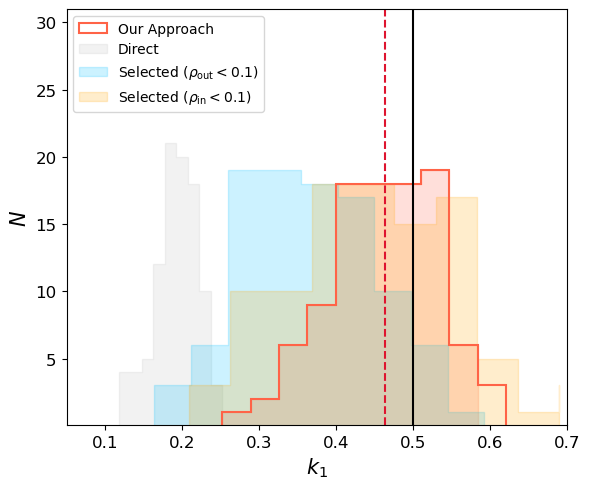

In [11]:
fig4_color1 = 'tomato'
fig4_color2 = 'silver'
fig4_color3 = 'deepskyblue'
fig4_color4 = 'orange'
def stephist(ax, data, bins, color, ls='-', label=None, stroke=True, lw=1,alpha=0.2):
    # stroke=True
    counts, bin_edges = np.histogram(data, bins=bins) 
    if stroke:
        ax.hist(data, bins=bin_edges, histtype="step", color=color, ls=ls,lw=lw,linewidth=1.5, label=label)
        ax.fill_between(bin_edges[:-1], counts, step="post", color=color, alpha=alpha)
    else:
        ax.fill_between(bin_edges[:-1], counts, step="post", color=color, alpha=alpha, label=label)
fig, ax = plt.subplots(1,1, figsize=(6,5))
stephist(ax, np.vstack(Coefs_figB)[:, 0], 10, fig4_color1, ls='-', label="Our Approach")
stephist(ax, np.vstack(Coefs_figB)[:, 3], 10, fig4_color2, ls='-', label="Direct", stroke=False, alpha=0.2)
stephist(ax, np.vstack(Coefs_figB)[:, 5], 10, fig4_color3, ls='-', label=r"Selected ($\rho_{\rm out}< 0.1$)", stroke=False, alpha=0.2)
stephist(ax, np.vstack(Coefs_figB)[:, 7], 10, fig4_color4, ls='-', label=r"Selected ($\rho_{\rm in}< 0.1$)", stroke=False, alpha=0.2)
ax.axvline(0.5, color='k')
ax.axvline(np.median(np.vstack(Coefs_figB)[:, 0]), ls='--', color='#DE142F')
ax.set_xlim(0.05, 0.7)
# ax.set_xlim(0.1,0.63)
ax.set_ylim(0.05, 31)
ax.legend()
ax.tick_params(axis='both', labelsize=12)

ax.set_xlabel(r"$k_1$", fontsize=15)
ax.set_ylabel(r"$N$", fontsize=15)
fig.tight_layout()
fig.savefig("demo.png")

We see that although it is slightly biased, it performs better than selecting by $\rho_{\rm out} < 0.1$ and is comparable to selection based on $\rho_{\rm in}<0.1$.